#EE769 Assignment 3(Principle Component Analysis)

##Vyomkesh Chaudhary
##203070028

In [1]:
import numpy as np                                      ##importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading Datasets

In [2]:
from google.colab import files

data_upload = files.upload()

for file_name in data_upload.keys():
  print(f"{file_name} has been uploaded, with length {len(data_upload[file_name])}")

Saving DataPCA.csv to DataPCA.csv
DataPCA.csv has been uploaded, with length 16504


In [4]:
df = pd.read_csv('/content/DataPCA.csv')                       ## Reading csv files into data frames

In [5]:
df

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367
...,...,...,...,...,...,...,...
185,0.894296,-1.270097,4.618647,4.005702,4.634847,0.156118,-0.215169
186,0.926559,-1.203508,4.766199,3.907673,4.538084,0.073321,-0.197924
187,1.678706,-1.227245,5.613809,2.864530,4.046335,-0.906304,-0.099063
188,1.693254,-1.323340,5.470576,3.023584,4.208331,-0.693895,-0.189082


#Observations:
1.There are 7 features.

2.There are 190 samples. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


#Observations:

 All features are numerical.


In [7]:
for col in df: # for each column
  unique_entries = pd.unique(df[col]) # unique elements in a column
  print(f"The column '{col}'  has {len(unique_entries)} unique entries, and {df[col].isnull().sum()} NaN values")

The column 'x1'  has 190 unique entries, and 0 NaN values
The column 'x2'  has 190 unique entries, and 0 NaN values
The column 'x3'  has 190 unique entries, and 0 NaN values
The column 'x4'  has 190 unique entries, and 0 NaN values
The column 'x5'  has 190 unique entries, and 0 NaN values
The column 'x6'  has 190 unique entries, and 0 NaN values
The column 'x7'  has 190 unique entries, and 0 NaN values


#Observations:
 
There are no Null entries.

# Part A :Visualize and pre-processing

In [9]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


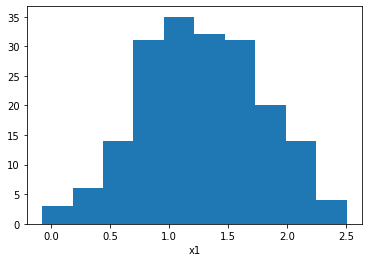

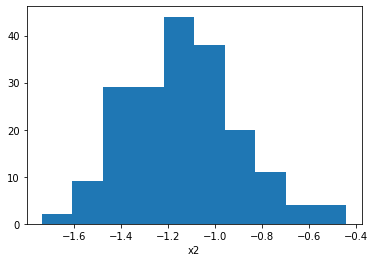

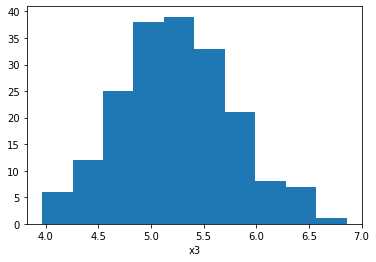

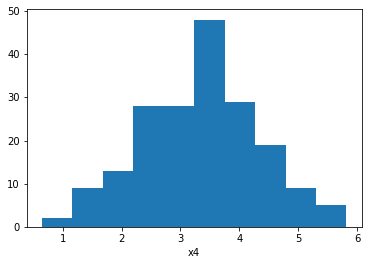

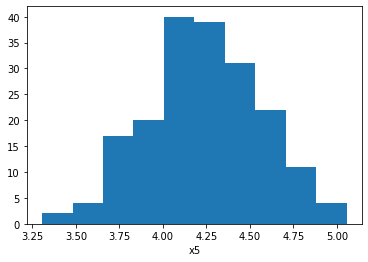

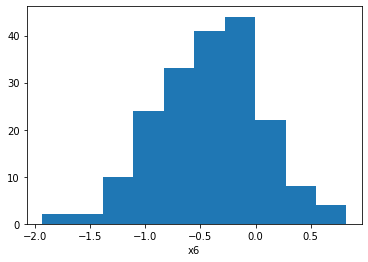

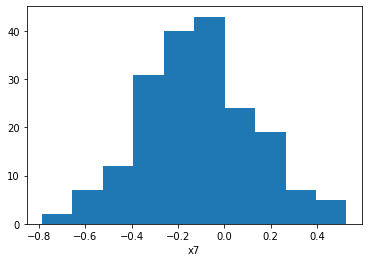

In [8]:
for col in df.columns.values: #for all columns
  #if the values are integer or discrete
  if(df[col].dtypes == 'int64') | (df[col].dtypes == 'float64'):
    plt.hist(df[col],10 if len(pd.unique(df[col]))>20 else len(pd.unique(df[col])))
    plt.xlabel(col)
    plt.show()

#Observations:

Data is well spreaded

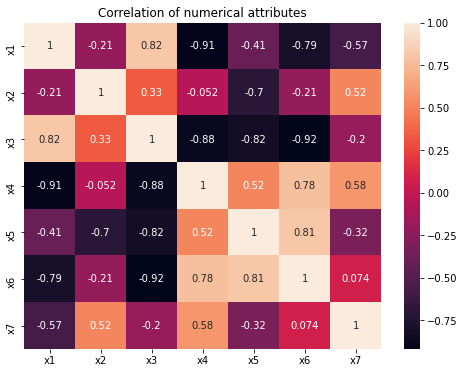

In [10]:
correlation = df.corr(method='spearman')

f, ax = plt.subplots(figsize=(8,6))
plt.title('Correlation of numerical attributes', size=12)
sns.heatmap(correlation,annot=True)

#Observations:

1. x1 and x3 are highly correlated.
2. x5 and x6 are highly correlated.
3. x4 and x6 are highly correlated

#Power Transformation

In [11]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
df_transformed = power.fit_transform(df)


In [12]:
df_transformed1 = pd.DataFrame(df_transformed)

#Part B : Train PCA




In [39]:
from sklearn.decomposition import PCA
pca = PCA()
y = pca.fit_transform(df_transformed1)

#Part C: Plot the variance explained versus PCA dimensions

In [40]:
pca.get_covariance()

array([[ 1.00529101, -0.20977607,  0.84815779, -0.92993796, -0.43932392,
        -0.80025008, -0.60311214],
       [-0.20977607,  1.00529101,  0.33972153, -0.02996555, -0.70705701,
        -0.21313479,  0.54586307],
       [ 0.84815779,  0.33972153,  1.00529101, -0.88729138, -0.83956179,
        -0.92452056, -0.21969821],
       [-0.92993796, -0.02996555, -0.88729138,  1.00529101,  0.52411095,
         0.77836722,  0.63091498],
       [-0.43932392, -0.70705701, -0.83956179,  0.52411095,  1.00529101,
         0.83914771, -0.32819946],
       [-0.80025008, -0.21313479, -0.92452056,  0.77836722,  0.83914771,
         1.00529101,  0.05806019],
       [-0.60311214,  0.54586307, -0.21969821,  0.63091498, -0.32819946,
         0.05806019,  1.00529101]])

In [41]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([6.09299130e-01, 3.18521678e-01, 6.54528745e-02, 6.19606432e-03,
       3.23877094e-04, 1.49261742e-04, 5.71147386e-05])

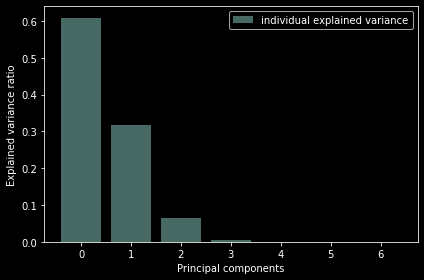

In [42]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

#Observations:

Thus we can see from the above plot that first two components constitute almost 90% of the variance.Third and fourth components has 10% of the data sprad. Therefore , rest of the components can be dropped.

#Part D : Reconstruct the data with various numbers of PCA dimensions, and compute the MSE.

# Taking 3 Components

In [64]:
pca=PCA(n_components=3)                                       #Considering Only first three components
X_new=pca.fit_transform(df_transformed1)

In [65]:
df_new = pca.inverse_transform(X_new)

In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

r2 = r2_score(y,df_new )
rmse = sqrt(mean_squared_error(y, df_new))
rmse

1.0439713814961162

# Taking 1 Components

In [67]:
pca=PCA(n_components=1)                                       #Considering Only first three components
X_new1 = pca.fit_transform(df_transformed1)

In [69]:
df_new1 = pca.inverse_transform(X_new1)

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

r2 = r2_score(y,df_new1 )
rmse = sqrt(mean_squared_error(y, df_new1))
rmse

1.0404820467099694

# Taking 5 Components

In [71]:
pca=PCA(n_components=5)                                       #Considering Only first three components
X_new5 = pca.fit_transform(df_transformed1)

In [72]:
df_new5 = pca.inverse_transform(X_new5)

In [79]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

r2 = r2_score(y,df_new5 )
rmse = sqrt(mean_squared_error(y, df_new5))
rmse

1.0449200527718017

#Observations:

Error is quite less because 1st and 2nd component contains 90 percent variance.

#Credits:

1.EE769 1 2 2 ML for Smart Monkeys, Youtube, Prof Amit Sethi, EE IITB

2.https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

3.https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html